## Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gc
from collections import defaultdict

## Load in data

### From the .xlsx

In [48]:
dtype = \
defaultdict(lambda: 'float64',
            Date='O', Mode='O', Tag='O', Species='O', Measurement='O', Version='O', CalibrationID='O', Coordinates='O',
            IntegrationTime='float64', Smoothing='int64', ScansToAverage='int64', Leaf='int64')
dtype['Wavelengths(nm)'] = 'O'
df = pd.read_excel('Combined Measurements 2 Aug Field Data.xlsx',
                   index_col=0,
                   dtype=dtype)

In [49]:
df.to_csv('Combined Measurements 2 Aug Field Data.xlsx')

### Reload now that it's CSV

In [50]:
dtype = \
defaultdict(lambda: 'float64',
            Date='O', Mode='O', Tag='O', Species='O', Measurement='O', Version='O', CalibrationID='O', Coordinates='O',
            IntegrationTime='float64', Smoothing='int64', ScansToAverage='int64', Leaf='int64')
dtype['Wavelengths(nm)'] = 'O'
df = pd.read_csv('Combined Measurements 2 Aug Field Data.csv',
                 index_col=0,
                 dtype=dtype)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0.0 to 566.0
Columns: 2061 entries, Date to 1337.730225
dtypes: float64(2049), int64(3), object(9)
memory usage: 8.9+ MB


In [63]:
df.iloc[:,:16].head(2)

Date             Mode  IntegrationTime(ms)  Smoothing  \
0.0  2023-11-03 01:03:00       Absorbance             8.289012          0   
1.0  2023-11-03 01:03:00  Abs Reflectance             1.683006          0   

     ScansToAverage        Tag                   Species  Leaf Measurement  \
0.0              16  Elaesa_3c  Elaeocarpus salicifolius     3           c   
1.0              16  Elaesa_3c  Elaeocarpus salicifolius     3           c   

      Version                         CalibrationID Coordinates  \
0.0  0.9.38.0  329a649b-49bb-4033-be46-ae77f0183c67         NaN   
1.0  0.9.38.0  329a649b-49bb-4033-be46-ae77f0183c67         NaN   

    Wavelengths(nm)  144.831543  145.4432983   146.055069  
0.0             NaN    0.320413     0.000000     0.000000  
1.0             NaN   45.112413   226.946314  3989.670377

In [70]:
df_metadata = df.iloc[:,:13]

In [71]:
df_metadata.head(1)

Date        Mode  IntegrationTime(ms)  Smoothing  \
0.0  2023-11-03 01:03:00  Absorbance             8.289012          0   

     ScansToAverage        Tag                   Species  Leaf Measurement  \
0.0              16  Elaesa_3c  Elaeocarpus salicifolius     3           c   

      Version                         CalibrationID Coordinates  \
0.0  0.9.38.0  329a649b-49bb-4033-be46-ae77f0183c67         NaN   

    Wavelengths(nm)  
0.0             NaN

In [67]:
df_wavelengths = df.iloc[:,13:]

In [69]:
df_wavelengths.head(1)

144.831543  145.4432983  146.055069  146.6667938  147.2785339  \
0.0    0.320413          0.0         0.0          3.0          0.0   

     147.8902283  148.5019226  149.1135864  149.7252502  150.3368835  ...  \
0.0          3.0          3.0     0.288375     1.592806     0.895768  ...   

     1332.85791  1333.399536  1333.941162  1334.482422  1335.023926  \
0.0         0.0     1.251521     1.058819     0.321945      1.18803   

     1335.565308  1336.106567  1336.647949  1337.189209  1337.730225  
0.0          0.0          0.0      1.22526     1.143846          0.0  

[1 rows x 2048 columns]

## Taking a look at the data

In [83]:
df_metadata.head(1)

Date        Mode  IntegrationTime(ms)  Smoothing  \
0.0  2023-11-03 01:03:00  Absorbance             8.289012          0   

     ScansToAverage        Tag                   Species  Leaf Measurement  \
0.0              16  Elaesa_3c  Elaeocarpus salicifolius     3           c   

      Version                         CalibrationID Coordinates  \
0.0  0.9.38.0  329a649b-49bb-4033-be46-ae77f0183c67         NaN   

    Wavelengths(nm)  
0.0             NaN

How many dates and times was our data collected on?

In [77]:
len(df['Date'].unique()), df['Date'].unique()[:10], df['Date'].unique()[-1], '...'

(93,
 array(['2023-11-03 01:03:00', '2023-11-03 01:02:00',
        '2023-11-03 01:01:00', '2023-11-03 01:00:00',
        '2023-11-03 00:57:00', '2023-11-03 00:56:00',
        '2023-11-03 00:55:00', '2023-11-03 00:53:00',
        '2023-11-03 00:52:00', '2023-11-03 00:51:00'], dtype=object),
 '2023-10-03 23:03:00',
 '...')

So, all day, but at many different times.

What modes does our data have?

In [79]:
df['Mode'].unique()

array(['Absorbance', 'Abs Reflectance', 'Abs Transmittance'], dtype=object)

So, each of these is actually a distinct thing.

In [81]:
len(df[df['Mode'] == 'Absorbance']), len(df[df['Mode'] == 'Abs Reflectance']), len(df[df['Mode'] == 'Abs Transmittance'])

(189, 189, 189)

So, 189 samples in each mode. Let's narrow down to the reflectance for now.

In [82]:
df_reflect = df[df['Mode'] == 'Abs Reflectance']

The distribution of the IntegrationTime?

<Axes: xlabel='IntegrationTime(ms)', ylabel='Density'>

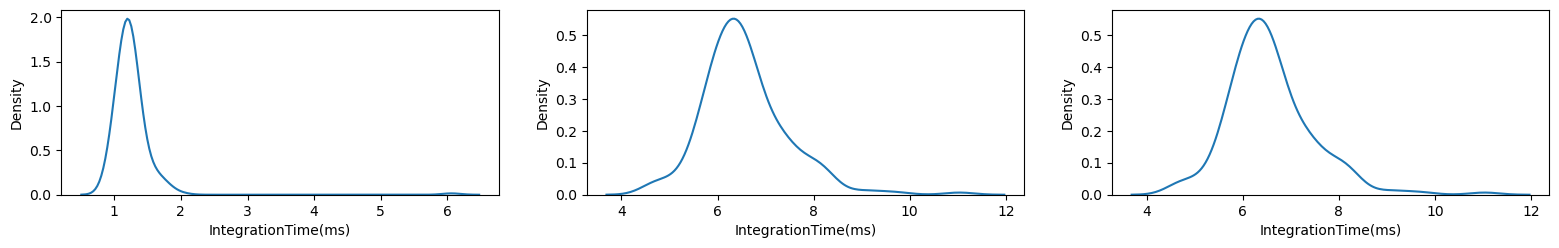

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8/2))
sns.kdeplot(df_reflect['IntegrationTime(ms)'], ax=ax[0])
sns.kdeplot(df[df['Mode'] == 'Absorbance']['IntegrationTime(ms)'], ax=ax[1])
sns.kdeplot(df[df['Mode'] == 'Abs Transmittance']['IntegrationTime(ms)'], ax=ax[2])

How many species and samples of each species do we have?

In [115]:
df_reflect['Species'].value_counts()

Species
Elaeocarpus salicifolius      9
Gironniera nervosa            9
Lindera lucida                9
Ixonanthes reticulata         9
Clerodendrum disparifolium    9
Aporosa benthamiana           9
Macaranga bancana             9
Guioa pubescens               9
Calophyllum teysmannii        9
Litsea elliptica              9
Elaeocarpus ferrugineus       9
Carallia brachiata            9
Calophyllum pulcherrimum      9
Elaeocarpus petiolatus        9
Rhodamnia cinerea             9
Calophyllum ferrugineum       9
Syzygium sp.                  9
Aporosa cf. frutescens        9
Macaranga conifera            9
Elaeocarpus mastersii         9
Timonius wallichianus         9
Name: count, dtype: int64

And how many samples per leaf?

In [125]:
df_reflect['Leaf'].value_counts()

Leaf
3    63
2    63
1    63
Name: count, dtype: int64

And how many samples per measurement?

In [170]:
df_reflect['Measurement'].value_counts()

Measurement
c    63
b    63
a    63
Name: count, dtype: int64

And how many samples per tag?

In [126]:
df_reflect['Tag'].value_counts()

Tag
Elaesa_3c    1
Guiopu_2b    1
Calote_2b    1
Calote_2a    1
Calote_1c    1
            ..
Rhodli_3a    1
Rhodli_2c    1
Rhodli_2b    1
Rhodli_2a    1
Timowa_1b    1
Name: count, Length: 189, dtype: int64

So, likely three leaves per species, and three measurements per leaf, adding up to 9 rows per species per mode.

## Replication of Slack plot

In [204]:
df_replicate = df_reflect[['Species', 'Leaf', 'Measurement', *df_wavelengths.columns]]
df_replicate = pd.melt(df_replicate, id_vars=['Species', 'Leaf', 'Measurement'], var_name='wavelength', value_name='reflectance', ignore_index=False)
df_replicate['wavelength'] = df_replicate['wavelength'].astype('float64')
df_replicate.head(2)

Species  Leaf Measurement  wavelength  reflectance
1.0  Elaeocarpus salicifolius     3           c  144.831543    45.112413
4.0  Elaeocarpus salicifolius     3           b  144.831543   401.195570

### When we plot one leaf and measurement per species

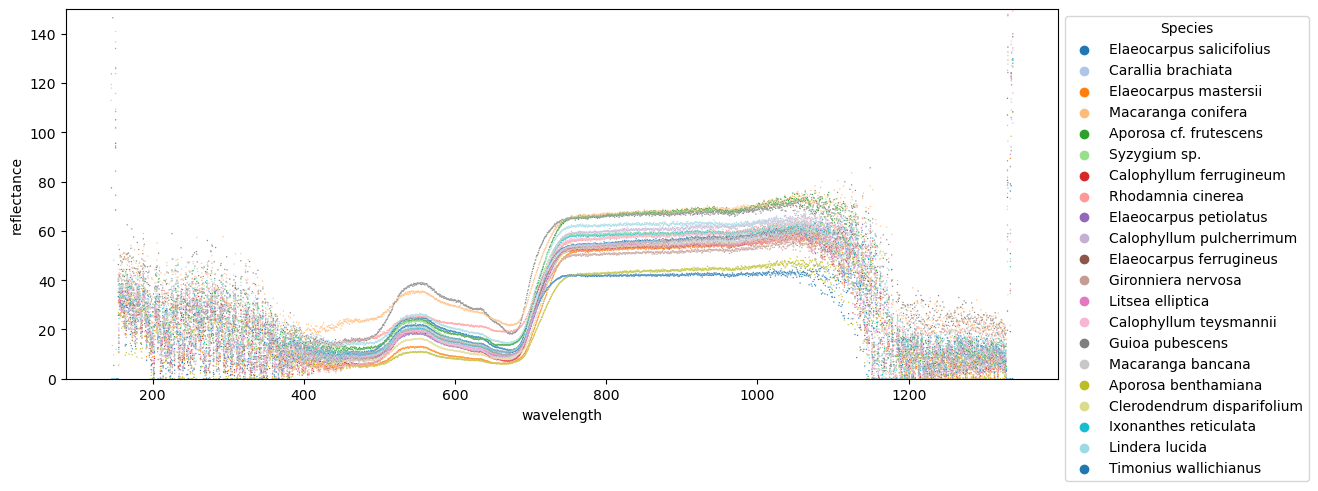

In [222]:
fig, ax = plt.subplots(figsize=(6.4*2, 4.8))
sns.scatterplot(df_replicate[(df_replicate['Leaf']==1) & (df_replicate['Measurement']=='a')],
             x='wavelength', y='reflectance', hue='Species',
             #estimator=None,
             ax=ax,
             palette='tab20',
             s=1)
ax.set_ylim(0, 150)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### When we plot multiple leaves and measurements per species

In [219]:
fig, ax = plt.subplots(figsize=(6.4*2, 4.8))
sns.scatterplot(df_replicate,
             x='wavelength', y='reflectance', hue='Species',
             #estimator=None,
             ax=ax,
             palette='tab20',
             s=1)
ax.set_ylim(0, 150)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Can we look just at the Macaranga?

In [223]:
fig, ax = plt.subplots(figsize=(6.4*2, 4.8))
sns.scatterplot(df_replicate[(df_replicate['Species']=='Macaranga conifera')],
             x='wavelength', y='reflectance', hue='Species',
             #estimator=None,
             ax=ax,
             palette='tab20',
             s=1)
ax.set_ylim(0, 150)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Can we look at the separations for each species?

In [224]:
fig, ax = plt.subplots(len(species), 1, figsize=(6.4*2, 4.8*len(species)))
for species_, ax in zip(species, ax):
    sns.scatterplot(df_replicate[(df_replicate['Species']==species_)],
             x='wavelength', y='reflectance', hue='Species',
             #estimator=None,
             ax=ax,
             palette='tab20',
             s=1)
    ax.set_ylim(0, 150)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Can we look at the Aporosa coloured by leaf?

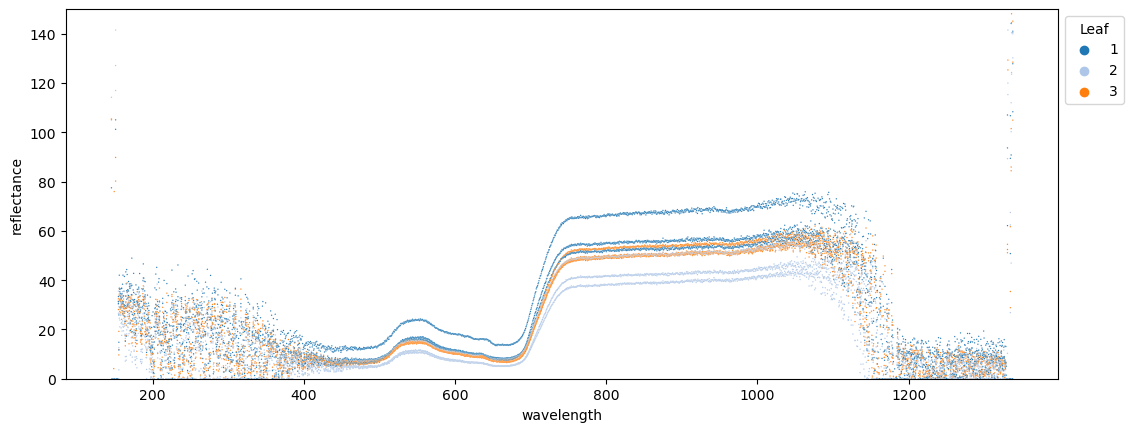

In [226]:
fig, ax = plt.subplots(figsize=(6.4*2, 4.8))
sns.scatterplot(df_replicate[(df_replicate['Species']=='Aporosa cf. frutescens')],
             x='wavelength', y='reflectance', hue='Leaf',
             #estimator=None,
             ax=ax,
             palette='tab20',
             s=1)
ax.set_ylim(0, 150)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Preprocessing: Can we take a moving average?

In [328]:
df_moving = df_replicate.groupby(['Species', 'Leaf', 'Measurement']).rolling(2, min_periods=1).mean().reset_index().drop('level_3', axis=1)

In [331]:
df_moving.head(2)

Species  Leaf Measurement  wavelength  reflectance
0  Aporosa benthamiana     1           a  144.831543   758.073898
1  Aporosa benthamiana     1           a  145.137421   459.069200